<a href="https://colab.research.google.com/github/anand1994sp/AutoSAVE/blob/main/ANAND_DT_AND_RFOREST_ET_ASSESMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns 

In [148]:
from sklearn.metrics import accuracy_score

from  sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [149]:
df=pd.read_csv("/content/admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Q1.Perform Exploratory Data Analysis (EDA) tasks
a) Visualize the 10 random rows of the data set
b) Generate the description for numeric variables
c) Check the shape of the data set
d) Generate the correlation matrix
e) Generate a correlogram 

In [150]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [151]:
for i in df.columns:
  print(df[i].value_counts())

1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64
3    162
2    1

In [152]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [153]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [155]:
df1=df.sample(n=10)
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
421,422,321,112,3,3.0,4.5,8.95,1,0.77
0,1,337,118,4,4.5,4.5,9.65,1,0.92
234,235,330,113,5,5.0,4.0,9.31,1,0.91
399,400,333,117,4,5.0,4.0,9.66,1,0.95
43,44,332,117,4,4.5,4.0,9.10,0,0.87
204,205,298,105,3,3.5,4.0,8.54,0,0.69
365,366,330,114,4,4.5,3.0,9.17,1,0.86
388,389,296,97,2,1.5,2.0,7.80,0,0.49
49,50,327,111,4,3.0,4.0,8.40,1,0.78
255,256,307,110,4,4.0,4.5,8.37,0,0.79


a)Randomly 10 rows a seen above

In [156]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


b)Generated the description for numeric variables above

In [157]:
df.shape

(500, 9)

c) Checked the shape of the data set above

In [158]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


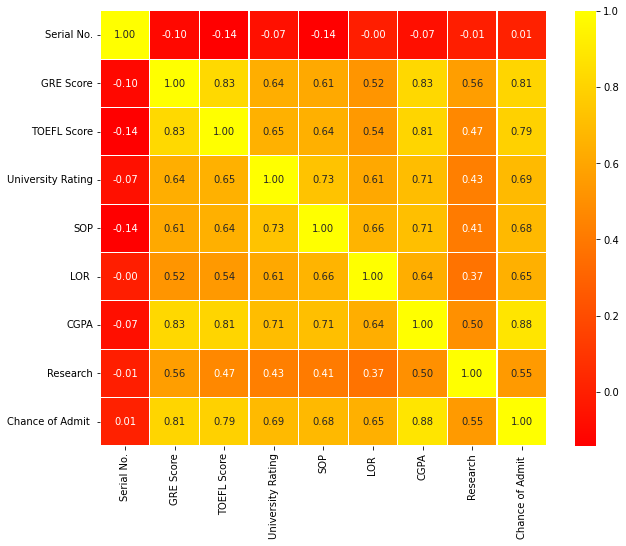

In [159]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.05,fmt=".2f",cmap="autumn")

d) Generated the correlation matrix above

In [160]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [161]:
df.columns=['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

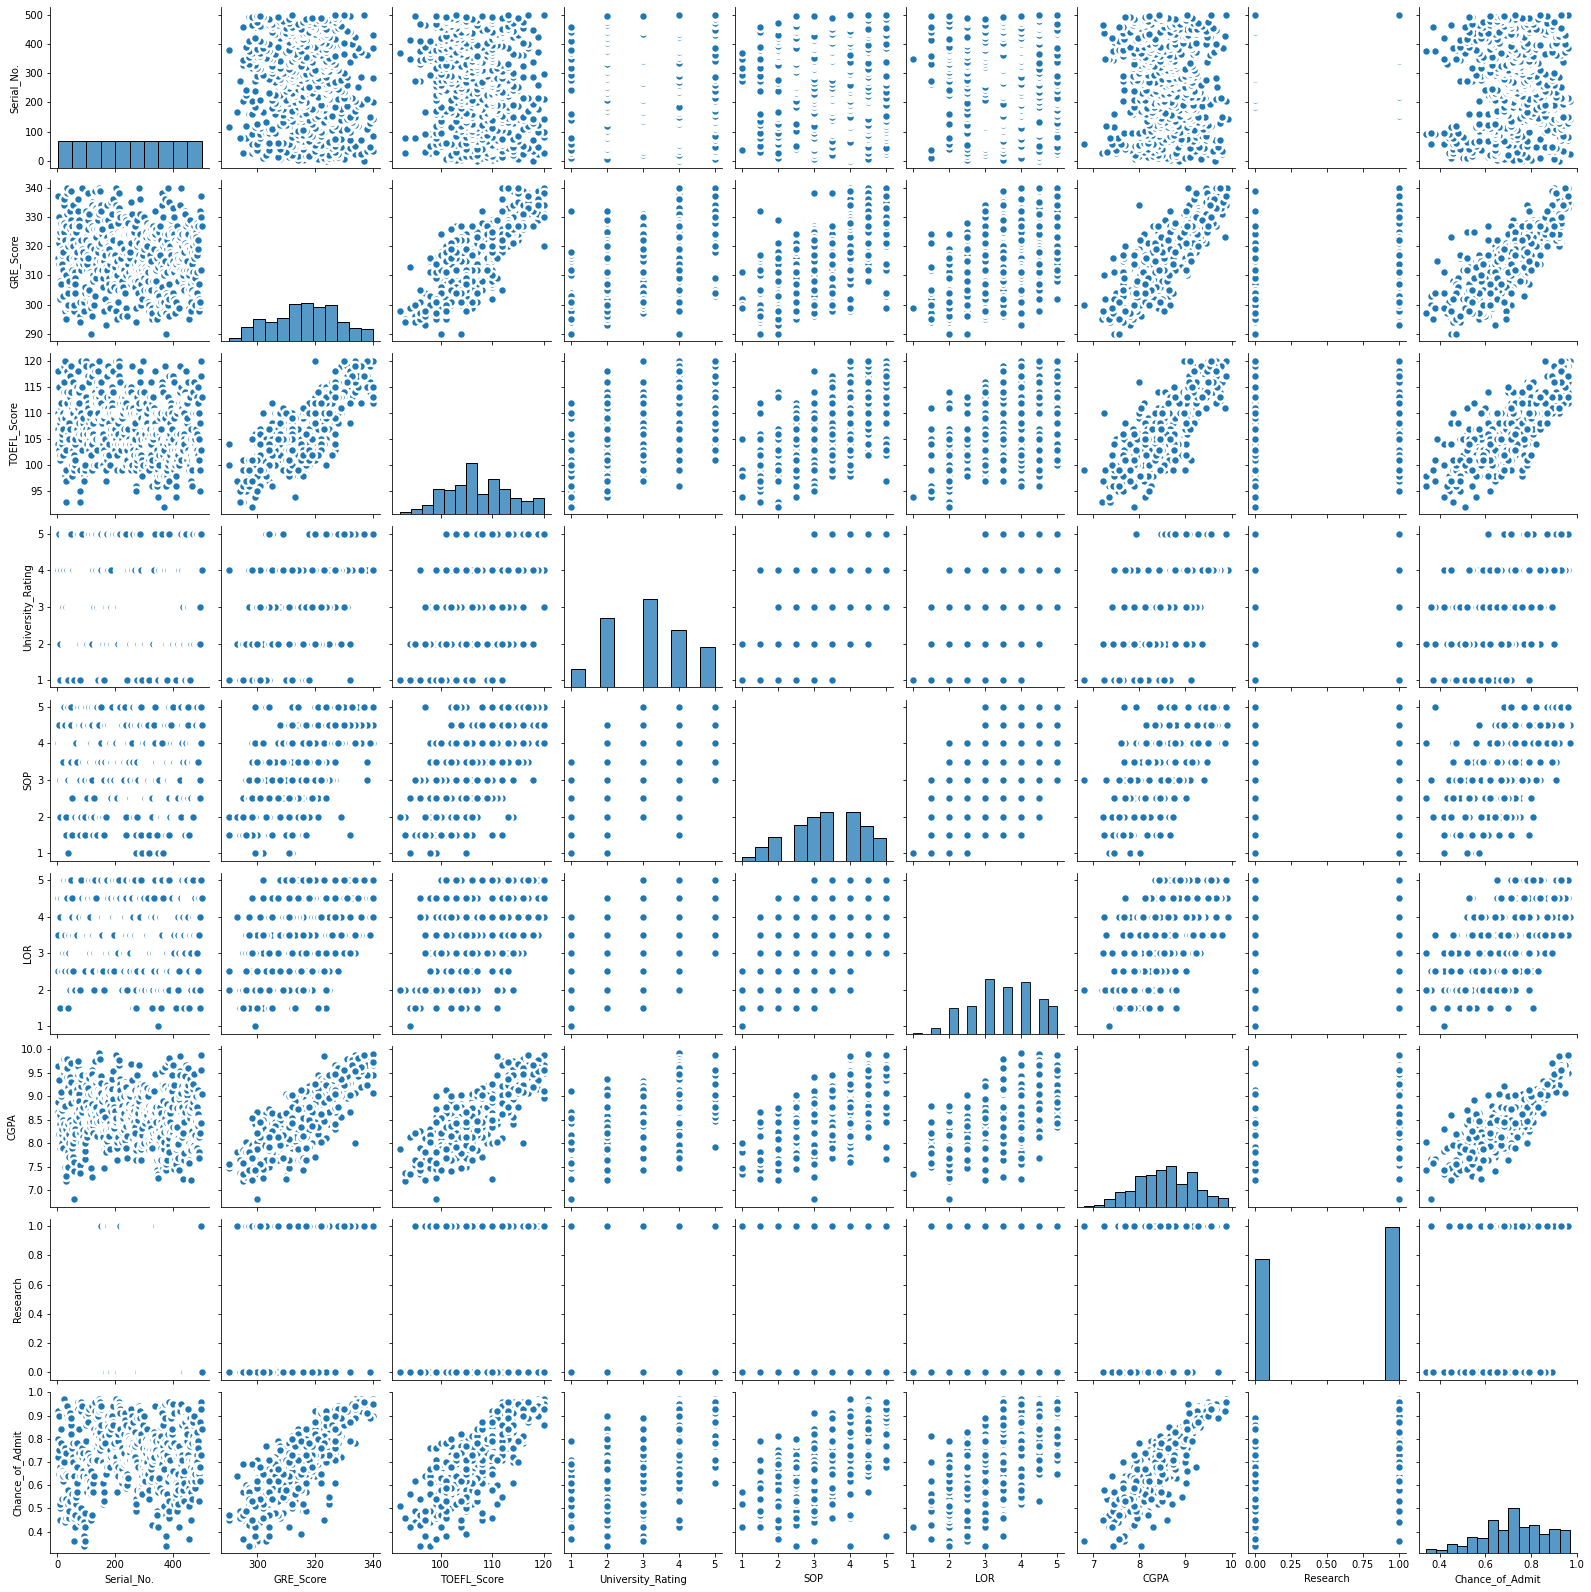

In [162]:
sns.pairplot(df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5),palette="Set2")
plt.show()

e) Generated a correlogram above

Q2.Find out the minimum and maximum values for GRE
score

In [163]:
df["GRE_Score"].min()

290

In [164]:
df["GRE_Score"].max()

340

Both min and maximum of GRE_Score is found above

Q3.Find out the percentage of universities for each
university rating

In [165]:
df.columns

Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [166]:
title=df["University_Rating"].unique()

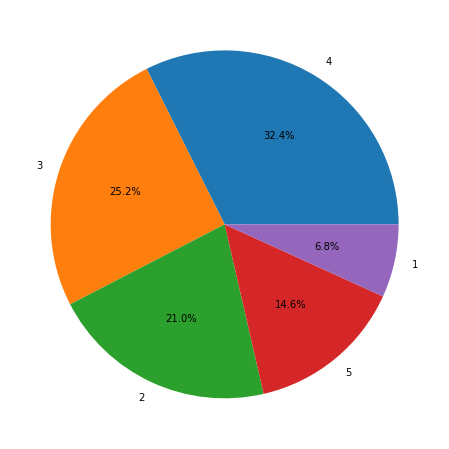

In [167]:
plt.figure(figsize=(8,8))
plt.pie(x=df['University_Rating'].value_counts(),labels=title,autopct='%1.1f%%')
plt.show()

In [168]:
title=df['University_Rating'].value_counts()
title=pd.DataFrame(title)
title["Percentage"]=title["University_Rating"]*100/sum(title["University_Rating"])
title

,University_Rating,Percentage
3,162,32.4
2,126,25.2
4,105,21.0
5,73,14.6
1,34,6.8


Q4.Convert the target variable “Chance of Admit” to
categorical having values 0 and 1,such that :
Students having the “Chance of Admit” value > 0.80, are assigned
value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned
value 0
Where 0: Low chance of Admission and 1: High chance of
admission

In [169]:
df['Chance_of_Admit'].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [170]:
df['Chance_of_Admit']=[1 if i > 0.80 else 0 for i in df['Chance_of_Admit']]

In [172]:
#df['Chance_of_Admit'] = df['Chance_of_Admit'].apply(lambda x : 1 if x > 0.80 else 0)

In [173]:
df['Chance_of_Admit'].value_counts()

0    358
1    142
Name: Chance_of_Admit, dtype: int64

In [174]:
df.head(3)

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0


Q5.Build a Decision Tree classifier, to predict whether a
student has a low or high chance of admission to a chosen
university. Perform Hyperparameter Tuning to improve
the accuracy of the model.

In [175]:
df.drop('Serial_No.', axis = 1, inplace = True)

In [176]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [177]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [178]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [179]:
DTC=DecisionTreeClassifier()

In [180]:
DTC.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [181]:
ypred=DTC.predict(xtest)

In [182]:
a1=accuracy_score(ytest,ypred)
a1

0.9

In [183]:
#Hypertuning1
DTCE= DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_leaf = 5,random_state=1994)

In [184]:
DTCE.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=1994)

In [185]:
ypred=DTCE.predict(xtest)

In [186]:
a2=accuracy_score(ytest,ypred)
a2

0.9

In [187]:
#Hypertuning1
DTCG= DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 2,random_state=2022)

In [188]:
DTCG.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=2022)

In [189]:
ypred=DTCG.predict(xtest)

In [190]:
a3=accuracy_score(ytest,ypred)
a3

0.91

In [191]:
print("General accuracy",a1*100)
print("Entropy accuracy",a2*100)
print("gini accuracy",a3*100)

General accuracy 90.0
Entropy accuracy 90.0
gini accuracy 91.0


 Decision Tree classifier is built, to predict whether a student has a low or high chance of admission to a chosen university. Performed Hyperparameter Tuning to improve the accuracy of the model.

 Based on hypertuning Entropy hyperparameter will be selected with accuracy of 93%

Q6.Build a Random Forest classifier, to predict whether a
student has a low or high chance of admission to a chosen
university

In [192]:
RF=RandomForestClassifier()

In [193]:
RF.fit(xtrain,ytrain)

RandomForestClassifier()

In [194]:
ypred=RF.predict(xtest)

In [195]:
a4=accuracy_score(ytest,ypred)
a4

0.94

In [196]:
cm=confusion_matrix(ytest,ypred)
cm

array([[70,  1],
       [ 5, 24]])

In [197]:
yproba=RF.predict_proba(xtest)

In [198]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [199]:
ypred_prob=yproba[:,-1]
ypred_prob

array([0.1 , 0.02, 0.02, 0.  , 0.02, 0.01, 0.46, 0.01, 0.2 , 1.  , 0.  ,
       0.11, 0.  , 0.05, 0.  , 0.91, 0.56, 0.  , 0.  , 0.  , 1.  , 0.01,
       0.  , 0.34, 0.01, 0.36, 0.06, 0.  , 0.22, 0.  , 0.05, 0.  , 0.01,
       0.82, 0.  , 0.  , 0.01, 1.  , 0.  , 0.02, 0.17, 0.43, 0.93, 0.21,
       0.  , 0.26, 0.99, 0.  , 0.  , 0.  , 0.01, 1.  , 0.01, 0.09, 0.99,
       0.01, 0.  , 0.01, 1.  , 0.  , 0.  , 0.04, 1.  , 1.  , 0.  , 0.  ,
       0.  , 0.  , 0.94, 0.  , 0.01, 0.  , 0.87, 0.04, 0.95, 0.  , 0.  ,
       0.19, 0.  , 0.94, 0.99, 0.01, 0.  , 0.  , 0.94, 1.  , 0.  , 0.03,
       0.  , 0.9 , 0.  , 0.01, 0.02, 1.  , 0.72, 0.9 , 0.16, 0.36, 0.92,
       0.01])

In [200]:
fpr,tpr,thresholds=roc_curve(ytest,ypred_prob)

In [201]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)

In [202]:
roc_auc*100

97.83875667799904

In [203]:
RFG=RandomForestClassifier(n_estimators = 100, criterion = 'gini', 
                                min_samples_split = 2, min_samples_leaf = 5, max_features = "auto",
                                random_state = 100, max_depth = 3) 

In [204]:
RFG.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [205]:
ypred=RFG.predict(xtest)

In [206]:
a7=accuracy_score(ytest,ypred)
a7

0.93

Built a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university

Q7.Also use Ensemble Modelling techniques, to predict
whether a student has a low or high chance of admission
to a chosen university.

In [207]:
bagging=BaggingClassifier(DecisionTreeClassifier())

In [208]:
bagging.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [209]:
ypred=bagging.predict(xtest)

In [210]:
a5=accuracy_score(ytest,ypred)
a5

0.9

In [211]:
roc_score1=roc_auc_score(ytest,ypred)
roc_score1

0.8581835842642059

In [212]:
adaboost = AdaBoostClassifier()

In [213]:
adaboost.fit(xtrain,ytrain)

AdaBoostClassifier()

In [214]:
ypred=adaboost.predict(xtest)

In [215]:
a6=accuracy_score(ytest,ypred)
a6

0.92

In [216]:
roc_score2=roc_auc_score(ytest,ypred)
roc_score2

0.9028654686741137

Q8.Compare all of the models and justify your choice about
the optimum model.

In [219]:
print("Accuracy of Normal Decision Tree",a1*100)
print("Accuracy of Entropy Decision Tree",a2*100)
print("Accuracy of Gini Decision Tree",a3*100)
print("Accuracy of Normal RandomForest",a4*100)
print("Accuracy of Gini RandomForest",a7*100)
print("Accuracy of Bagging Ensemble,roc_score,a",a5*100,round(roc_score1,3))
print("Accuracy of Adaboost Ensemble,roc_score",a6*100,round(roc_score2,3))


Accuracy of Normal Decision Tree 90.0
Accuracy of Entropy Decision Tree 90.0
Accuracy of Gini Decision Tree 91.0
Accuracy of Normal RandomForest 94.0
Accuracy of Gini RandomForest 93.0
Accuracy of Bagging Ensemble,roc_score,a 90.0 0.858
Accuracy of Adaboost Ensemble,roc_score 92.0 0.903


**Since the accuracy of Random Forest 94 using hyperparameter like Gini is more than all other algorithm it will be selected for final choice**

**Compared all of the models and justified your choice about the optimum model based on Accuracy**